<br>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Intrusion Detection Systems</h2> 
<br>

# Problem Statement
With the dramatic growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly while the all the systems suffers from security vulnerabilities, which could increase the attacks that could negatively affects the economy.
Therefore detecting vulnerabilities in the system in the network has been more important and need to be done as accurate as possible in real time.
in this notebook a model will be created and trained using SVM classifier to distengush if there is an attack or not in the network packet.


## Intrusion detection systems
* Host-Based IDS (HIDS): A host-based IDS is deployed on a particular endpoint and designed to protect it against internal and external threats. Such an IDS may have the ability to monitor network traffic to and from the machine, observe running processes, and inspect the system’s logs. A host-based IDS’s visibility is limited to its host machine, decreasing the available context for decision-making, but has deep visibility into the host computer’s internals.
* Network-Based IDS (NIDS): A network-based IDS solution is designed to monitor an entire protected network. It has visibility into all traffic flowing through the network and makes determinations based upon packet metadata and contents. This wider viewpoint provides more context and the ability to detect widespread threats; however, these systems lack visibility into the internals of the endpoints that they protect.

Detection Method of IDS:

* Signature-based Method:
Signature-based IDS detects the attacks on the basis of the specific patterns such as number of bytes or number of 1’s or number of 0’s in the network traffic. It also detects on the basis of the already known malicious instruction sequence that is used by the malware. The detected patterns in the IDS are known as signatures.
Signature-based IDS can easily detect the attacks whose pattern (signature) already exists in system but it is quite difficult to detect the new malware attacks as their pattern (signature) is not known.

* Anomaly-based Method:
Anomaly-based IDS was introduced to detect unknown malware attacks as new malware are developed rapidly. In anomaly-based IDS there is use of machine learning to create a trustful activity model and anything coming is compared with that model and it is declared suspicious if it is not found in model. Machine learning-based method has a better-generalized property in comparison to signature-based IDS as these models can be trained according to the applications and hardware configurations.

<a id="0"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> Data Collection</h2>

### Intrusion Detection Systems
#### Source : https://www.kaggle.com/code/essammohamed4320/intrusion-detection-system-with-ml-dl/input

<h2 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Table of Contents</h2>

   #### [1. Data Preparocessing](#1)
   #### [2. Explory Data Analysis](#2)
   #### [3. Model Training](#3)
   #### [4. Vectorization](#4)
   #### [5. Model Evaluation](#5)
   #### [6. Deployment](#6)

## ***Importing necessary libraries***

In [1]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("../data/Train_data.csv")
test = pd.read_csv("../data/Test_data.csv")

In [3]:
train.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal


In [4]:
train.shape

(25192, 42)

In [5]:
test.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.0,0.0


In [6]:
test.shape

(22544, 41)

In [7]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
train.duplicated().sum()

0

In [9]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
test.duplicated().sum()

57

In [11]:
test.drop_duplicates(inplace=True)

In [12]:
test.duplicated().sum()

0

In [13]:
train['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    25192
Name: count, dtype: int64

In [14]:
test['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    22487
Name: count, dtype: int64

In [15]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [16]:
# Attack Class Distribution
train['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

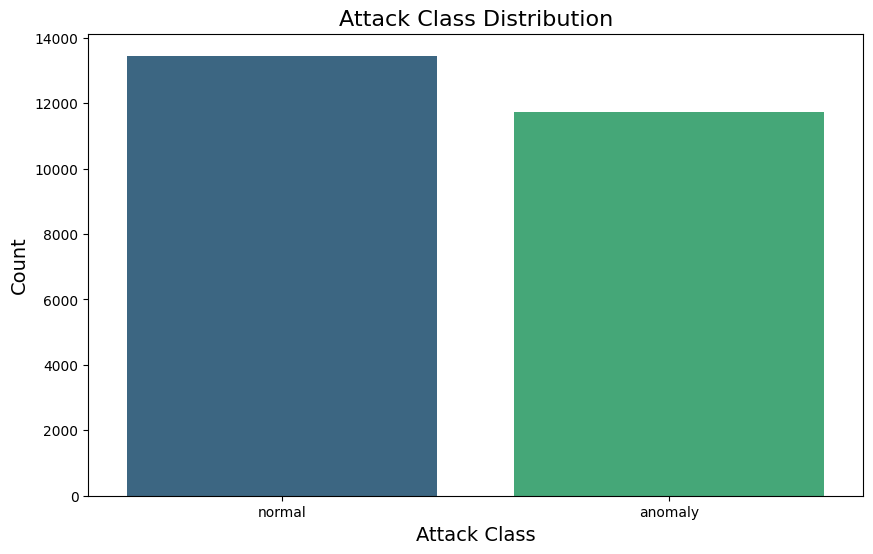

In [17]:
# Generate countplot for 'class' column
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=train, palette='viridis')
plt.title('Attack Class Distribution', fontsize=16)
plt.xlabel('Attack Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

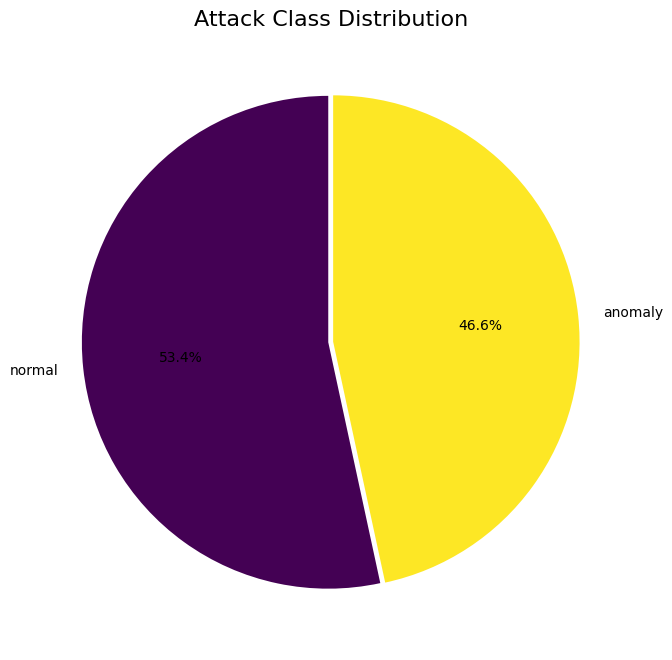

In [18]:
# Generate a pie chart for 'class' column distribution
plt.figure(figsize=(8, 8))
train['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', explode=[0.01]*len(train['class'].unique()))
plt.title('Attack Class Distribution', fontsize=16)
plt.ylabel('')  # Remove y-label for a cleaner pie chart
plt.show()

In [303]:
# sns.pairplot(train,hue='class')

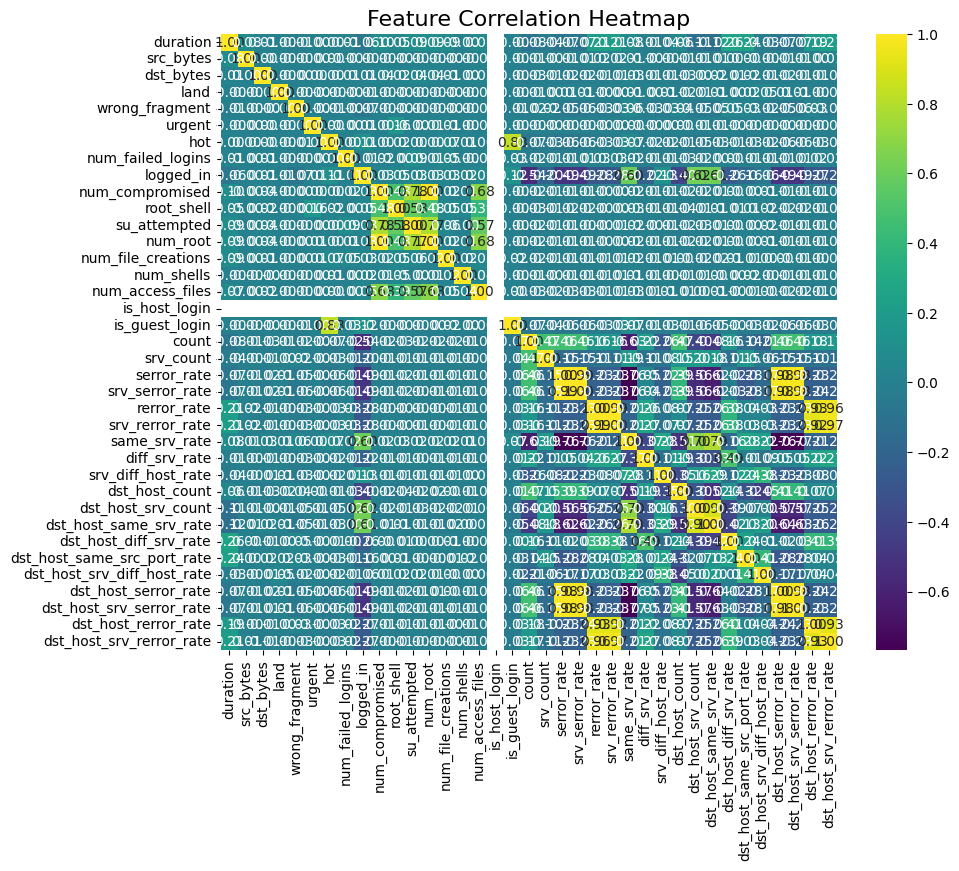

In [19]:
numeric_train = train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


In [20]:
train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [21]:
test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

In [25]:
# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
encoder = LabelEncoder()

In [28]:
# extract categorical attributes from both training and test sets 
cat_train = train.select_dtypes(include=['object']).copy()
cat_test = test.select_dtypes(include=['object']).copy()

In [29]:
# encode the categorical attributes
train_cat = cat_train.apply(encoder.fit_transform)
test_cat = cat_test.apply(encoder.fit_transform)

In [30]:
# separate target column from encoded data 
enc_train = train_cat.drop(['class'], axis=1)
cat_Ytrain = train_cat[['class']].copy()

In [31]:
train_x = pd.concat([sc_traindf,enc_train],axis=1)
train_y = train['class']
train_x.shape

(25192, 40)

In [32]:
test_df = pd.concat([sc_testdf,test_cat],axis=1)
test_df.shape

(22544, 40)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [34]:
# fit random forest classifier on the training set
rfc.fit(train_x, train_y)

RandomForestClassifier()

In [35]:
# extract important features
score = np.round(rfc.feature_importances_,3)

importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

<Axes: xlabel='feature'>

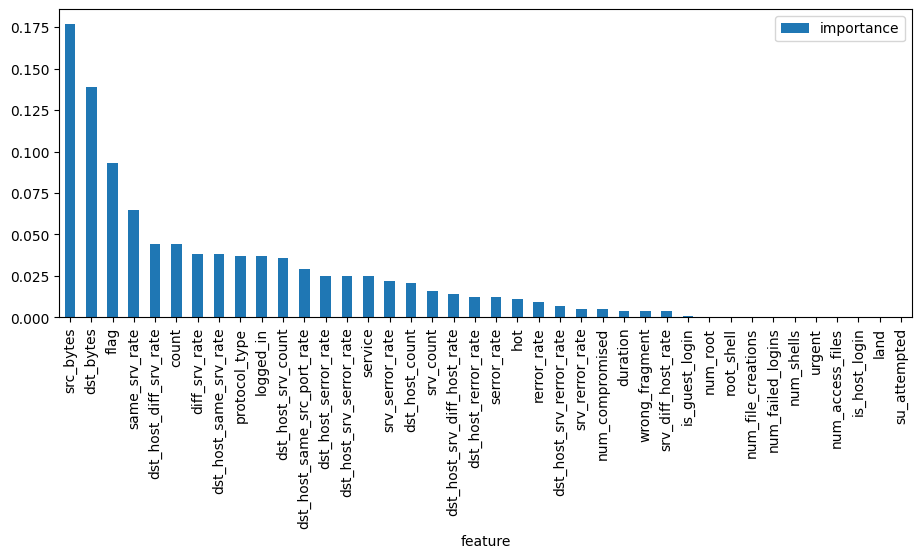

In [36]:
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [37]:
from sklearn.feature_selection import RFE
import itertools

In [38]:
# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(train_x, train_y)

In [39]:
# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

In [40]:
selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'protocol_type',
 'service',
 'flag']

In [46]:
X = train_x[selected_features]
y = train_y

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size=0.75, random_state=2)

In [55]:
X_train.head(3)

,src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_same_srv_rate,dst_host_same_src_port_rate,protocol_type,service,flag
594,-0.004601,-0.03931,-0.702802,0.772109,-0.349282,-0.422758,0.591993,1,19,9
18835,-0.010093,-0.03931,1.738962,-1.388806,-0.013235,-1.113281,-0.478183,1,46,5
6545,-0.010093,-0.03931,1.346536,-1.434299,-0.069243,-0.979631,-0.445754,1,46,5


In [56]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

# Train Support Vector Classifier Model
SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

# Train Random Forest Model
RF_Classifier = RandomForestClassifier(n_jobs=-1, random_state=0)
RF_Classifier.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [58]:
from sklearn import metrics

In [59]:
# Initialize models
BNB_Classifier = BernoulliNB()
DTC_Classifier = tree.DecisionTreeClassifier()
KNN_Classifier = KNeighborsClassifier()
LGR_Classifier = LogisticRegression()
SVC_Classifier = SVC()
RF_Classifier = RandomForestClassifier()

In [60]:
# Naive Bayes Classifier Evaluation
print('============================== Naive Baye Classifier Evaluation ==============================')
bnb_scores = cross_val_score(BNB_Classifier, X_train, Y_train, cv=10)
BNB_Classifier.fit(X_train, Y_train)
bnb_accuracy = metrics.accuracy_score(Y_train, BNB_Classifier.predict(X_train))
bnb_confusion_matrix = metrics.confusion_matrix(Y_train, BNB_Classifier.predict(X_train))
bnb_classification = metrics.classification_report(Y_train, BNB_Classifier.predict(X_train))

print("Cross Validation Mean Score:\n", bnb_scores.mean())
print("\nModel Accuracy:\n", bnb_accuracy)
print("\nConfusion matrix:\n", bnb_confusion_matrix)
print("\nClassification report:\n", bnb_classification)
print()

============================== Naive Baye Classifier Evaluation ==============================
Cross Validation Mean Score:
 0.8875297811613322

Model Accuracy:
 0.8875304329416746

Confusion matrix:
 [[7174 1640]
 [ 485 9595]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.81      0.87      8814
      normal       0.85      0.95      0.90     10080

    accuracy                           0.89     18894
   macro avg       0.90      0.88      0.89     18894
weighted avg       0.89      0.89      0.89     18894




In [61]:
# Decision Tree Classifier Evaluation
print('============================== Decision Tree Classifier Evaluation ==============================')
dtc_scores = cross_val_score(DTC_Classifier, X_train, Y_train, cv=10)
DTC_Classifier.fit(X_train, Y_train)
dtc_accuracy = metrics.accuracy_score(Y_train, DTC_Classifier.predict(X_train))
dtc_confusion_matrix = metrics.confusion_matrix(Y_train, DTC_Classifier.predict(X_train))
dtc_classification = metrics.classification_report(Y_train, DTC_Classifier.predict(X_train))

print("Cross Validation Mean Score:\n", dtc_scores.mean())
print("\nModel Accuracy:\n", dtc_accuracy)
print("\nConfusion matrix:\n", dtc_confusion_matrix)
print("\nClassification report:\n", dtc_classification)
print()

============================== Decision Tree Classifier Evaluation ==============================
Cross Validation Mean Score:
 0.9950249425103845

Model Accuracy:
 0.9998941462898274

Confusion matrix:
 [[ 8814     0]
 [    2 10078]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8814
      normal       1.00      1.00      1.00     10080

    accuracy                           1.00     18894
   macro avg       1.00      1.00      1.00     18894
weighted avg       1.00      1.00      1.00     18894




In [62]:
# KNeighbors Classifier Evaluation
print('============================== KNeighbors Classifier Evaluation ==============================')
knn_scores = cross_val_score(KNN_Classifier, X_train, Y_train, cv=10)
KNN_Classifier.fit(X_train, Y_train)
knn_accuracy = metrics.accuracy_score(Y_train, KNN_Classifier.predict(X_train))
knn_confusion_matrix = metrics.confusion_matrix(Y_train, KNN_Classifier.predict(X_train))
knn_classification = metrics.classification_report(Y_train, KNN_Classifier.predict(X_train))

print("Cross Validation Mean Score:\n", knn_scores.mean())
print("\nModel Accuracy:\n", knn_accuracy)
print("\nConfusion matrix:\n", knn_confusion_matrix)
print("\nClassification report:\n", knn_classification)
print()

============================== KNeighbors Classifier Evaluation ==============================
Cross Validation Mean Score:
 0.9885677313099229

Model Accuracy:
 0.992378532867577

Confusion matrix:
 [[ 8710   104]
 [   40 10040]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      8814
      normal       0.99      1.00      0.99     10080

    accuracy                           0.99     18894
   macro avg       0.99      0.99      0.99     18894
weighted avg       0.99      0.99      0.99     18894




In [63]:
# Logistic Regression Evaluation
print('============================== Logistic Regression Evaluation ==============================')
lgr_scores = cross_val_score(LGR_Classifier, X_train, Y_train, cv=10)
LGR_Classifier.fit(X_train, Y_train)
lgr_accuracy = metrics.accuracy_score(Y_train, LGR_Classifier.predict(X_train))
lgr_confusion_matrix = metrics.confusion_matrix(Y_train, LGR_Classifier.predict(X_train))
lgr_classification = metrics.classification_report(Y_train, LGR_Classifier.predict(X_train))

print("Cross Validation Mean Score:\n", lgr_scores.mean())
print("\nModel Accuracy:\n", lgr_accuracy)
print("\nConfusion matrix:\n", lgr_confusion_matrix)
print("\nClassification report:\n", lgr_classification)
print()

============================== Logistic Regression Evaluation ==============================
Cross Validation Mean Score:
 0.9423620179205144

Model Accuracy:
 0.9424685085212237

Confusion matrix:
 [[8134  680]
 [ 407 9673]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.92      0.94      8814
      normal       0.93      0.96      0.95     10080

    accuracy                           0.94     18894
   macro avg       0.94      0.94      0.94     18894
weighted avg       0.94      0.94      0.94     18894




In [ ]:
# Naive Bayes Classifier Test Results
print('============================== Naive Bayes Classifier Test Results ==============================')
bnb_accuracy = metrics.accuracy_score(Y_test, BNB_Classifier.predict(X_test))
bnb_confusion_matrix = metrics.confusion_matrix(Y_test, BNB_Classifier.predict(X_test))
bnb_classification = metrics.classification_report(Y_test, BNB_Classifier.predict(X_test))

print("Model Accuracy:\n", bnb_accuracy)
print("\nConfusion matrix:\n", bnb_confusion_matrix)
print("\nClassification report:\n", bnb_classification)
print()

# Support Vector Classifier Test Results
print('============================== Support Vector Classifier Test Results ==============================')
svc_accuracy = metrics.accuracy_score(Y_test, SVC_Classifier.predict(X_test))
svc_confusion_matrix = metrics.confusion_matrix(Y_test, SVC_Classifier.predict(X_test))
svc_classification = metrics.classification_report(Y_test, SVC_Classifier.predict(X_test))

print("Model Accuracy:\n", svc_accuracy)
print("\nConfusion matrix:\n", svc_confusion_matrix)
print("\nClassification report:\n", svc_classification)
print()

# Random Forest Classifier Test Results
print('============================== Random Forest Classifier Test Results ==============================')
rf_accuracy = metrics.accuracy_score(Y_test, RF_Classifier.predict(X_test))
rf_confusion_matrix = metrics.confusion_matrix(Y_test, RF_Classifier.predict(X_test))
rf_classification = metrics.classification_report(Y_test, RF_Classifier.predict(X_test))

print("Model Accuracy:\n", rf_accuracy)
print("\nConfusion matrix:\n", rf_confusion_matrix)
print("\nClassification report:\n", rf_classification)
print()

# Train on test data

In [64]:
# Naive Bayes Classifier Test Results
print('============================== Naive Bayes Classifier Test Results ==============================')
bnb_accuracy = metrics.accuracy_score(Y_test, BNB_Classifier.predict(X_test))
bnb_confusion_matrix = metrics.confusion_matrix(Y_test, BNB_Classifier.predict(X_test))
bnb_classification = metrics.classification_report(Y_test, BNB_Classifier.predict(X_test))

print("Model Accuracy:\n", bnb_accuracy)
print("\nConfusion matrix:\n", bnb_confusion_matrix)
print("\nClassification report:\n", bnb_classification)
print()

============================== Naive Bayes Classifier Test Results ==============================
Model Accuracy:
 0.8791679898380438

Confusion matrix:
 [[2353  576]
 [ 185 3184]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.93      0.80      0.86      2929
      normal       0.85      0.95      0.89      3369

    accuracy                           0.88      6298
   macro avg       0.89      0.87      0.88      6298
weighted avg       0.88      0.88      0.88      6298




In [65]:
# Decision Tree Classifier Test Results
print('============================== Decision Tree Classifier Test Results ==============================')
dtc_accuracy = metrics.accuracy_score(Y_test, DTC_Classifier.predict(X_test))
dtc_confusion_matrix = metrics.confusion_matrix(Y_test, DTC_Classifier.predict(X_test))
dtc_classification = metrics.classification_report(Y_test, DTC_Classifier.predict(X_test))

print("Model Accuracy:\n", dtc_accuracy)
print("\nConfusion matrix:\n", dtc_confusion_matrix)
print("\nClassification report:\n", dtc_classification)
print()

============================== Decision Tree Classifier Test Results ==============================
Model Accuracy:
 0.9952365830422356

Confusion matrix:
 [[2913   16]
 [  14 3355]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      2929
      normal       1.00      1.00      1.00      3369

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298




In [66]:
# KNeighbors Classifier Test Results
print('============================== KNeighbors Classifier Test Results ==============================')
knn_accuracy = metrics.accuracy_score(Y_test, KNN_Classifier.predict(X_test))
knn_confusion_matrix = metrics.confusion_matrix(Y_test, KNN_Classifier.predict(X_test))
knn_classification = metrics.classification_report(Y_test, KNN_Classifier.predict(X_test))

print("Model Accuracy:\n", knn_accuracy)
print("\nConfusion matrix:\n", knn_confusion_matrix)
print("\nClassification report:\n", knn_classification)
print()

============================== KNeighbors Classifier Test Results ==============================
Model Accuracy:
 0.9874563353445538

Confusion matrix:
 [[2888   41]
 [  38 3331]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      2929
      normal       0.99      0.99      0.99      3369

    accuracy                           0.99      6298
   macro avg       0.99      0.99      0.99      6298
weighted avg       0.99      0.99      0.99      6298




In [67]:
# Logistic Regression Test Results
print('============================== Logistic Regression Test Results ==============================')
lgr_accuracy = metrics.accuracy_score(Y_test, LGR_Classifier.predict(X_test))
lgr_confusion_matrix = metrics.confusion_matrix(Y_test, LGR_Classifier.predict(X_test))
lgr_classification = metrics.classification_report(Y_test, LGR_Classifier.predict(X_test))

print("Model Accuracy:\n", lgr_accuracy)
print("\nConfusion matrix:\n", lgr_confusion_matrix)
print("\nClassification report:\n", lgr_classification)
print()

============================== Logistic Regression Test Results ==============================
Model Accuracy:
 0.9379167989838044

Confusion matrix:
 [[2682  247]
 [ 144 3225]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.92      0.93      2929
      normal       0.93      0.96      0.94      3369

    accuracy                           0.94      6298
   macro avg       0.94      0.94      0.94      6298
weighted avg       0.94      0.94      0.94      6298




In [ ]:
X_test